# Microphone Arrays

This notebook is a faithful reproduction of AN-1140, Application Note on Microphone arrays by TDK Invensense. Although the application note covers the basic idea and advantages of different array configurations, this notebook delves a bit deeper and expands upon the governing equations that make such directivity patterns possible.

For simplicity, only 2-element microphone arrays are presented as they are adequate to provide an overview of commonly used array configurations.

https://invensense.tdk.com/download-pdf/an-1140-microphone-array-beamforming/

In [1]:
# Import relevant libraries
 
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction
Microphone array processing refers to the use of multiple microphones to improve the reception a signal using propagating sound waves. The fundamental theory behind this technique is well established and built upon the general wave equation This makes it applicable to a variety of fields such as optics, electromagnetism, seismology, sonar, etc.

Note: any reference to the "front" of the array is the on-axis direction which is the expected direction of arrival and thereby labeled as $0^\circ$.

All MEMS microphones have an omnidirectional pickup response, which means that they respond equally to sounds coming from any direction. Multiple microphones can be configured in an array to form a directional response or a beam pattern. A beamforming microphone array can be designed to be more sensitive to sound coming from one or more specific directions than sound coming from other directions.

## 2. Broadside Beamformer
### 2.1. Description
A broadside array is where a line of microphones is perpendicular to the preferred direction of sound waves. This array requires simple processing; the individual microphone responses are simply summed together. This array's response is axisymmetric, the rear-facing response always matches the front-facing response.

Such an array configuration is popular when there is not much sound expected from the top or bottom of the array, such as a TV or a laptop.

### 2.2. Sketch

<div>
<img src="NotebookPictures/broadsidebeamformer.png" width="500"/>
</div>

### 2.3. Derivation
In the sketch with two real microphones $m_1$ and $m_2$, let $m_0$ be a virtual microphone that represents the effects of summing of $m_1$ and $m_2$.

Let both the electronic path delays be $\tau_1=0$ and $\tau_2=0$. Let $\Delta r$ be the path difference for the plane wavefront landing at $m_1$ and $m_2$ with respect to $m_0$, respectively.

In presence of homogeneous plane waves approaching from infinity (or, the far field), the general solution of the pressure developed at $m_0$ at any given instant $t$ is given by,

\begin{equation}
\tilde{p_0} = \tilde{A_+}e^{-jkx},
\end{equation}

where, $\tilde{A_+}$ is the complex valued amplitude $Ae^{j\omega t}$ and $k$ is angular wavenumber. 

Likewise through trigonometric relations, the pressure at $m_1$ is given by,

\begin{equation}
\tilde{p_1} = \tilde{A_+}e^{-jk(x - \Delta r)},
\end{equation}

and that of $m_2$ is given by,

\begin{equation}
\tilde{p_1} = \tilde{A_+}e^{-jk(x + \Delta r)},
\end{equation}

where $\Delta r = \dfrac{dsin\theta}{2}$.

Summing the pressures developed at the real microphones, we get

\begin{aligned}
\tilde{p_{o}}&= \tilde{p_1} + \tilde{p_2}\\
&= \tilde{A_+}e^{-jk(x - \Delta r)} + \tilde{A_+}e^{-jk(x + \Delta r)}\\
&= \tilde{A_+}e^{-jkx}(e^{jk\Delta r} + e^{-jk\Delta r})\\
&= \tilde{p_0}(e^{-jk\Delta r} + e^{jk\Delta r})\\
&= \tilde{p_0}(e^{\frac{-jkdsin\theta}{2}} + e^{\frac{jkdsin\theta}{2}})\\
&= \tilde{p_0}D(\theta),
\end{aligned}

where, $D(\theta)$ is the directivity function which describes the reception pattern of the beamformer, for a given incident $\lambda$ from any direction $\theta$. Alternatively, it can be expressed as,
\begin{aligned}
D(\theta) &= e^{\frac{-jkdsin\theta}{2}} + e^{\frac{jkdsin\theta}{2}}\\
&= 2cos(\frac{kdsin\theta}{2})\\
&= 2cos(\frac{\pi dsin\theta}{\lambda})\\
\text{or}\\
D(\theta)_{norm} &= |cos(\frac{\pi dsin\theta}{\lambda})|\hspace{1em} \text{...(if normalized)}.
\end{aligned}

From the above equation, it is evident that there will be signal boost or attenuation in the combined response $\tilde{p_o}$ based on the incident angle as well as the frequency content being captured. Hence, the directivity function is dependent on both $\theta$ and $\lambda$ as $D(\theta, \lambda)_{norm}$.

In [2]:
""" DIRECTIVITY FUNCTION DEFINITION """
def calcDF_bs(element_spacing, frequencies, angles):
    c = 343                                   # in m/s, speed of sound at STP
    lambda_ = c / frequencies                # in m, wavelength
    DF_bs = np.cos((np.pi / lambda_) * d_bs * np.sin(angles))  # Directivity pattern of broadside beamformer
    return np.abs(DF_bs)/np.max(np.abs(DF_bs))

# Sample Broadside array (as described in Figure 4, Pg 3, AN1140)
d_bs = 75e-3                              # in mm, broadside element spacing

### 2.4. Observations:

#### 2.4.1. Directivity

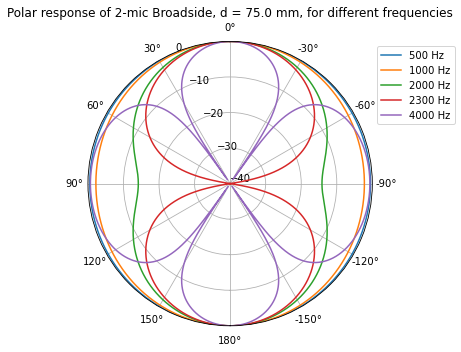

In [3]:
"""NORMALIZED DIRECTIVITY PLOT"""
theta = np.linspace(0, 2 * np.pi, 4000)   # in radians, array of angles of observation
f_obs = np.array([0.5e3, 1e3, 2e3, 2.3e3, 4e3])  # in Hz, frequencies

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5), subplot_kw={'projection':'polar'})
for i in range(0, len(f_obs)):
    ax.plot(theta, 20*np.log10(np.abs(calcDF_bs(d_bs, f_obs[i], theta))),
            label=str(round(f_obs[i]))+" Hz")

# Plot info
ax.set_rlim([-40, 0])
ax.set_rticks([-40, -30, -20, -10, 0])
ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 12, endpoint=False))
ax.set_thetalim([-np.pi, np.pi])
ax.set_theta_zero_location("N")

ax.set_title(r"Polar response of 2-mic Broadside, d = " + str(d_bs*1e3) + r" mm, for different frequencies")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
fig.tight_layout()

From the polar response, it has been demonstrated that the pickup pattern of the beamformer array is axisymmetric. Broadside arrays are therefore, well suited for applications that have thin surfaces but expect incoming sound in the direction facing that surface, such as a laptop, smart-televisions or conference systems.

In a 2-microphone broadside array, there are two minima or null in the response at 90° and 270°. The response approaches perfect cancellation as the half-wavelength of the incident frequency approaches the spacing between the microphones. For an array with two microphones spaced 75 mm apart, theoretically there is a perfect null at approximately 2.3 kHz (343 m/sec ÷ (0.075 m × 2) ≈ 2.3 kHz)

However, the performance of such a beamformer suffers from heavy spatial aliasing depending upon the element spacing and the frequency of interest. Beyond the frequency where perfect attenuation occurs, the polar response will indicate nulls at other angles. In the example shown, there is upto 15 dB attenuation at 90° and -90° for 2 kHz when compared to 0$^\circ$. However, there is very little attenuation for the same at 4 kHz. Furthermore, this type of beamformer is omnidirectional at low frequencies and thus, has a tendency to pickup low-frequency noise from all directions.

Increasing the number of elements can narrow this directivity pattern facing forward. For example, adding more number of equally spaced and equally weighted microphones within the 75 mm aperture can be viewed as increasing the sampling rate across "space", which in-turn raises the aliasing frequency. This is analogous to the Nyquist-Shannon sampling theorem.

#### 2.4.2. Frequency response

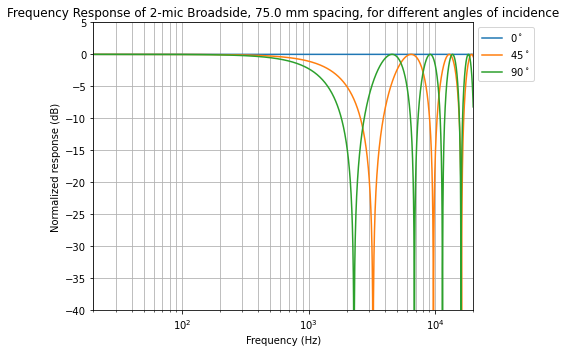

In [4]:
"""NORMALIZED FREQUENCY RESPONSE PLOT"""
theta = np.array([0, np.pi/4, np.pi/2])   # in radians, array of angles of observation
f_obs = np.linspace(20, 20e3, 2000)  # in Hz, frequencies

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
for i in range(0, len(theta)):
    ax.semilogx(f_obs, 20*np.log10(np.abs(calcDF_bs(d_bs, f_obs, theta[i]))),
               label=str(round(np.rad2deg(theta[i])))+"$^\circ$")

# Plot info
ax.set_ylim([-40, 5])
ax.set_xlim([20, 20e3])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized response (dB)')
ax.grid(b=True, which="both")

ax.set_title(r"Frequency Response of 2-mic Broadside, " + str(d_bs*1e3) + r" mm spacing, for different angles of incidence")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
fig.tight_layout()

A broadside beamformer has a flat frequency response on-axis since it is simply summing the signals from two microphones 
receiving the same signal. The above plot shows the normalized response of a 2-microphone broadside beamformer with 75 mm spacing. Off-axis, this figure clearly shows the nulls in the response.

## 3. Endfire Beamformer
### 3.1. Description
An endfire array consists of multiple microphones arranged in line with the desired direction of sound propagation. When the front microphone in the array (the first that sound propagating on-axis reaches) is summed with an inverted and delayed signal from the rear microphone(s), this configuration is called a differential array.

Based on the distance $d$ between the microphones and by delaying the output from the rear microphone by $n$ samples before the subtraction, it can be used to create cardioid, hypercardioid, or supercardioid pickup patterns, where the sound from the rear of the array is greatly attenuated.

### 3.2. Sketch
<div>
<img src="NotebookPictures/endfirebeamformer.png" width="500"/>
</div>

### 3.3. Derivation
In the sketch with two real microphones $m_1$ and $m_2$, let $m_0$ be a virtual microphone at the midpoint between the two, with which it represents the difference between $m_1$ and $m_2$. Let $d$ be the microphone (or element) spacing.

The time difference in the wavefront arriving from the Front direction from between $m_1$ to $m_2$ can be calculated as $\tau = \dfrac{d}{343}$ m/s.

For this derivation, let the electronic path delay $\tau_1=0$ and while keeping $\tau_2$ variable. With $\tau_2$, the delay is an additional degree of control over the beamformer performance. Let $\Delta r$ be the path difference for the plane wavefront landing at $m_1$ and $m_2$ with respect to $m_0$, respectively.

In presence of homogeneous plane waves approaching from infinity (or, the far field), the general solution of the pressure developed at $m_0$ at any given instant $t$ is given by,

\begin{equation}
\tilde{p_0} = \tilde{A_+}e^{-jkx},
\end{equation}

where, $\tilde{A_+}$ is the complex valued amplitude $Ae^{j\omega t}$ and $k$ is angular wavenumber. 

Likewise through trigonometric relations, the pressure at $m_1$ is given by,

\begin{equation}
\tilde{p_1} = \tilde{A_+}e^{-jk(x - \Delta r)},
\end{equation}

and that of $m_2$ is given by,

\begin{equation}
\tilde{p_2} = \tilde{A_+}e^{-jk(x + \Delta r)}e^{-jk\tau_2},
\end{equation}

where $\Delta r = \dfrac{dsin\theta}{2}$.

For a differential beamforming array, the output is:

\begin{aligned}
\tilde{p_{o}}&= \tilde{p_2} - \tilde{p_1}\\
&= \tilde{A_+}e^{-jk(x + \Delta r)}e^{-jk \tau_2c} - \tilde{A_+}e^{-jk(x - \Delta r)}\\
&= \tilde{A_+}e^{-jkx}(e^{-jk\Delta r}e^{-jk\tau_2c} - e^{jk\Delta r})\\
&= \tilde{p_0}(e^{-jk(\Delta r + \tau_2c)} - e^{jk\Delta r})\\
&= \tilde{p_0}(e^{-jk\big(\frac{dcos\theta}{2} + \tau_2c\big)} - e^{\frac{jkdcos\theta}{2}})\\
&= \tilde{p_0}D(\theta),
\end{aligned}

where, $D(\theta)$ is the directivity function which describes the reception pattern of the beamformer, for a given incident $\lambda$ from any direction $\theta$.

From the above equation, it is evident that there will be signal boost or attenuation in the combined response $\tilde{p_o}$ based on the incident angle as well as the frequency content being captured. Hence, the directivity function is dependent on both $\theta$ and $\lambda$ as $D(\theta, \lambda)_{norm}$.

In [39]:
""" DIRECTIVITY FUNCTION DEFINITION """

# %% Directivity function (2-source or 2-mic system)
def calcDF_ef(element_spacing, frequencies, angles, delay=0):
    c = 343                      # in m/s, speed of sound at STP
    lambda_ = c / frequencies   # in m, wavelength
    k = 2 * np.pi / lambda_      # wavenumber
    DF_ef = np.exp(-1j * k * 
                   (0.5 * element_spacing * np.cos(angles) + delay * c)) - np.exp(0.5j *
                                                                                  k * element_spacing * np.cos(angles))
    #return np.abs(DF_ef)/np.max(np.abs(DF_ef))
    return np.abs(DF_ef)

# Sample Endfire array (as described in Figure 9, Pg 6, AN1140)
d_ef = 21e-3                     # in m, endfire array spacing

### 3.4. Observations

#### 3.4.1. Directivity
The sound picked up by the different microphones in the endfire array differs only in the arrival time, assuming far-field propagation that can be approximated by a plane wave. The benefit of differential microphones is that they have higher off-axis cancellation, which is highly consistent until its spatial cutoff frequency, based on the element spacing.

To create a cardioid pickup pattern, the signal from the rear microphones should be delayed by the same time that it takes the sound waves to travel between the two microphone elements. $\tau_2$ = $\tau$. This pattern promotes high rejection at the rear side of the array.

To create a supercardioid pickup pattern, the signal from the rear microphones should be delayed by the same time that it takes the sound waves to travel between the two microphone elements. $\tau_2$ = $\dfrac{\tau}{2}$. This pattern has a narrower main-lobe and offers slightly increase side rejection with some tradeoff in increased signal pickup from the rear. It is used in places where the desired rejection is not the rear but slightly more spread out.

To create a dipole or "Figure of 8" pickup pattern, the signal from the rear microphones should be delayed by the same time that it takes the sound waves to travel between the two microphone elements. $\tau_2$ = 0. This pattern has axisymmetry about its sides and offers high degree of side rejection, while promoting equal pickup from the front and rear.

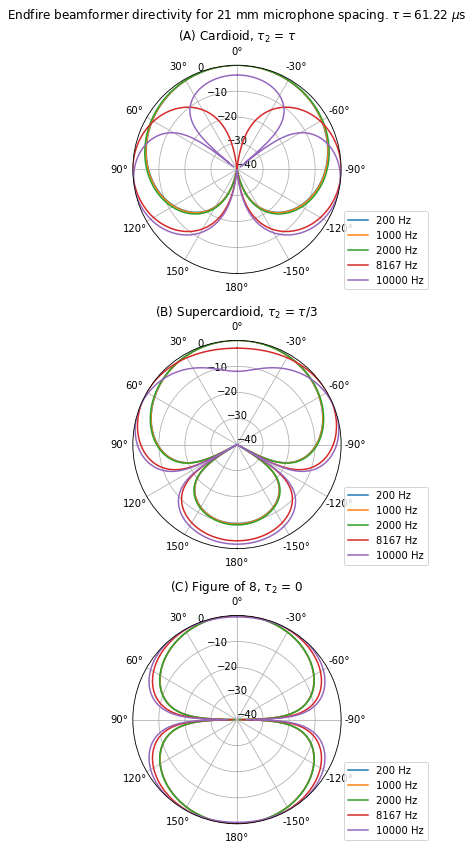

In [48]:
"""NORMALIZED DIRECTIVITY PATTERNS WITH DIFFERENT TIME DELAYS"""
# %% Define constants for 2 element beamforming array
theta = np.linspace(0, 2*np.pi, 1000)       # in radians
freq = np.array([200, 1e3, 2e3, 8166.67, 10e3])  # in Hz, frequency
c = 343                                     # in m/s, speed of sound at STP
lambda_ = c / freq  # in m, wavelength
tau_2 = (d_ef / c) * np.array([1, 0.5, 0])

# %% Plot directivity of beamformers

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 12),
                       subplot_kw={'projection': 'polar'})

subplot_titles = [r"(A) Cardioid, $\tau_2$ = $\tau$",
                  r"(B) Supercardioid, $\tau_2$ = $\tau/3$ ",
                  r"(C) Figure of 8, $\tau_2$ = 0"]

for i in range(len(ax)):
    for j in range(len(freq)):
        plotvar = calcDF_ef(d_ef, freq[j], theta, tau_2[i])
        ax[i].plot(theta, 20*np.log10(plotvar/np.max(plotvar)), label=str(round(freq[j]))+" Hz")
        
        # Plot info
        ax[i].set_rlim([-40, 0])
        ax[i].set_rticks([-40, -30, -20, -10, 0])
        ax[i].set_xticks(np.pi/180. * np.linspace(180,  -180, 12, endpoint=False))
        ax[i].set_thetalim([-np.pi, np.pi])
        ax[i].set_theta_zero_location("N")
        ax[i].set_title(subplot_titles[i])
        ax[i].legend(bbox_to_anchor=(1.44,-0.10), loc="lower right")

fig.suptitle(r"Endfire beamformer directivity for 21 mm microphone spacing. $\tau = 61.22$ $\mu$s")
fig.tight_layout()

For endfire beamformers, the designer has two degrees of freedom: the distance between the microphones and the delay applied. The choice of delay time is quantized by the sampling rate $f_s$ of the audio codec that processes the microphone inputs. If the codec's delay can quantized at the rate of $f_s$ = 48 kHz, that minimum delay (time period) is approximately 21 μs (20.833 μs to be precise).

A sound wave travels at 343 m/sec, which in turn, covers about 7 mm in 21 μs. Such types of sample delays can be implemented with different filters such as delayed sync filters, allpass filters, and FFT filterbanks. Such filters are often included in software and/or firmware libraries of the audio codec or system-on-chip (SoC) solutions.

As with the broadside array, the spacing between the microphones determines the first null in the desired direction response. The closer the microphones are spaced to each other, the higher in frequency this null is (and therefore wider bandwidth until aliasing occurs). The further apart they are spaced, the longer the physical length of the array is, possibly conflicting with the industrial design limitations. 

For the cardioid pickup pattern plotted above, the endfire microphone array spacing $d$ is 21 mm. The propagation time delay to the cover the distance between $m_1$ to $m_2$ is around 61.2245 μs. Therefore, if we use a codec with an $f_s$ of 48 kHz, a 3-sample delay results in an acoustical time delay of about 63 μs. This is approximately the time it takes sound to travel about 21 mm.

Furthermore, the half-wavelength of an 8.2 kHz sound wave is 21 mm, therefore, this leads to out-of-phase cancellation at the summing end for this frequency. For a 10 kHz sound wave, two additional nulls at about ±52° are also present.

The degree of aliasing based on frequency is entirely dependent on the amount of phase cancellation introduced between the two microphone signals at the summing end, controlled both by varying the distance as well as delay between the two.

#### 3.4.2. Distance matching

Matching the distance between microphones with the electrical delay is critical to good performance of the beamforming array. Following plot demonstrates the effect of varying the physical distance between microphones while keeping the delay constant. Once again, a 3-sample delay using an $f_s$ of 48 kHz is used to achieve a cardioid response pattern for a 1000 Hz incoming signal.

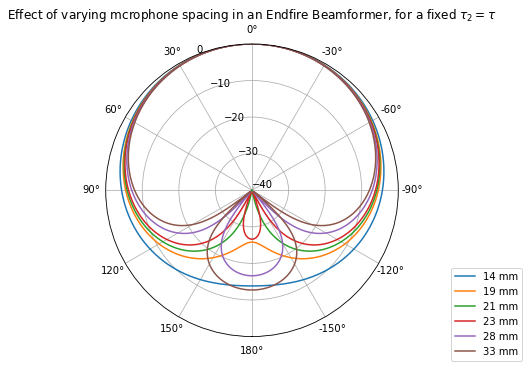

In [50]:
""" DIRECTIVITY PATTERN FOR DIFFERENT MICROPHONE DISTANCES"""
# Array of different microphone array spacings, in m
d_ef_array = np.array([14, 19, 21, 23, 28, 33]) * 1e-3

# %% Plot directivity of beamformers

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 12),
                       subplot_kw={'projection': 'polar'})

for i in range(len(d_ef_array)):
    plotvar = calcDF_ef(d_ef_array[i], 1000, theta, tau_2[0])
    ax.plot(theta, 20*np.log10(plotvar/np.max(plotvar)),
            label=str(round(d_ef_array[i]*1e3))+" mm")

ax.set_rlim([-40, 0])
ax.set_rticks([-40, -30, -20, -10, 0])
ax.set_xticks(np.pi/180. * np.linspace(180,  -180, 12, endpoint=False))
ax.set_thetalim([-np.pi, np.pi])
ax.set_theta_zero_location("N")
ax.legend(bbox_to_anchor=(1.44,-0.10), loc="lower right")
ax.set_title(r"Effect of varying mcrophone spacing in an Endfire Beamformer, for a fixed $\tau_2 = \tau$")
fig.tight_layout()

When the distance between microphones is less than 21 mm, the rear null is much less pronounced and the response is in 
a subcardioid pattern. When the physical distance is greater than 21 mm, the resulting pattern is a hypercardioid, with two rear nulls 
spaced equally from the 180° point.

#### 3.4.3. Frequency response
The differential array beamformer does not have a flat frequency response, but rather has a high-pass filter response characteristic up to the null frequency. The response of a first-order beamformer (two microphone elements) rises with frequency at 6 dB/octave and flattens above the aliasing frequency. At the null frequency, the array theoretically has no output because the delayed signal exactly matches the signal from the front microphone.

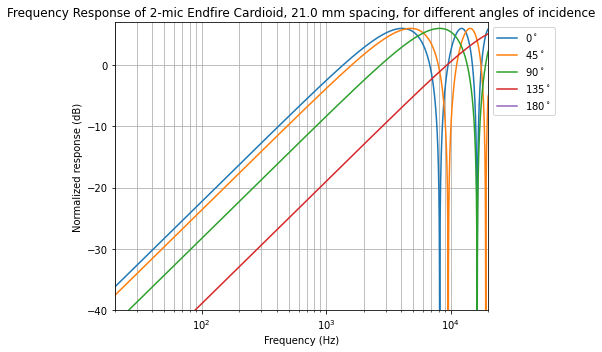

In [56]:
"""NORMALIZED FREQUENCY RESPONSE PLOT"""
theta = np.array([0, np.pi/4, np.pi/2, 3 * np.pi/4, np.pi*0.999])   # in radians, array of angles of observation
f_obs = np.linspace(20, 20e3, 2000)                           # in Hz, frequencies

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
for i in range(len(theta)):
    ax.semilogx(f_obs, 20*np.log10(calcDF_ef(21e-3, f_obs, theta[i], tau_2[0])),
               label=str(round(np.rad2deg(theta[i])))+"$^\circ$")

# Plot info
ax.set_ylim([-40, 7])
ax.set_xlim([20, 20e3])
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized response (dB)')
ax.grid(b=True, which="both")

ax.set_title(r"Frequency Response of 2-mic Endfire Cardioid, " +
             str(d_ef*1e3) + r" mm spacing, for different angles of incidence")
ax.legend(bbox_to_anchor=(1, 1), loc="upper left")
fig.tight_layout()

Here, the 0 dB point is the output level of a single omnidirectional microphone. This beamformer is set up with 21 mm spacing and a 3-sample delay, giving the on-axis null at 8.2 kHz. On axis, the response increases at 6 dB/octave up to the point where the quarter-wavelength, $\dfrac{\lambda}{4}$ of the incident signal matches the microphone spacing. Beyond this point, the response decreases to the null point and increases back to maximum at the $n$-th multiple of the quarter wavelength, $n\dfrac{\lambda}{4}$.

Likewise, when the spacing between array elements matches the half-wavelength $\dfrac{\lambda}{2}$ of the incident signal, there are additional nulls at successive $n$ multiples of that half-wavelength, $n\dfrac{\lambda}{2}$.

Typically, an equalization filter (for example, a shelf filter) is added after the delay-sum stage to boost the attenuated low frequencies. The null frequency should be selected so that it does not interfere with frequencies of interest such as the bandwidth of human speech, but not so high that low frequencies are attenuated more than is desired, making it difficult to amplify with electronics.

## 4. Summary

| Array configuration | Advantage | Disadvantage |
| --- | --- | --- |
| Broadside beamformer | Shallow array depth | Low off-axis attenuation |
|     | Simple processing (sum only) | Small element spacing necessary to prevent aliasing |
|     |     |   |
| Endfire beamformer | Superior off-axis attenuation | Can lead to deeper array depth |
|     | Smaller overall size | Processing complexity high due to time delay being critical |
|     |                      | Low frequency response is attenuated |

It should also be noted that good performance from a microphone beamformer requires that the sensitivity and frequency response of the different elements of the array be closely matched. Differences in these two parameters between different array elements result in a breakdown of the array’s desired response. Nulls may not be as sharp and the array’s directionality may not be properly oriented.